In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


In [3]:
t = sp.Symbol('t')
alpha, theta, phi = sp.Function('alpha')(t),sp.Function('theta')(t),sp.Function('phi')(t)
d, l1, l2 = sp.symbols('d l1 l2')
x,y,z = sp.symbols('x y z')
d1,d21,d22,d3 = sp.symbols('d1 d21 d22 d3')
g, m1,m2,m3 = sp.symbols('g m1 m2 m3')

In [4]:
def T(p):
    px,py,pz =p
    return sp.Matrix([[1,0,0,px],
                       [0,1,0,py],
                       [0,0,1,pz],
                       [0,0,0,1]])
def U(ax,angel):
    cos = sp.cos
    sin = sp.sin
    if(ax == sp.Symbol('x')):
        return sp.Matrix([[1,0,0,0]
                      ,[0,cos(angel),-sin(angel),0]
                      ,[0,sin(angel),cos(angel),0]
                      ,[0,0,0,1]])
    if(ax == sp.Symbol('y')):
        return sp.Matrix([[cos(angel),0,sin(angel),0]
                          ,[0,1,0,0]
                          ,[-sin(angel),0,cos(angel),0]
                          ,[0,0,0,1]])
    if(ax == sp.Symbol('z')):
        return sp.Matrix([[cos(angel),-sin(angel),0,0]
                          ,[sin(angel),cos(angel),0,0]
                          ,[0,0,1,0]
                          ,[0,0,0,1]])
    
def SUM(mat):
    res = sp.zeros(mat[0].shape[0],mat[0].shape[1])
    for vec in mat:
        res += vec
    return res

In [5]:
final_vector = sp.simplify(U(y,alpha) @ T([d,0,0]) @ U(x,-theta) @ T([0,0,-l1]) @ U(x,-phi) @ T([0,0,-l2]))[0:3,-1]
final_vector

Matrix([
[ d*cos(alpha(t)) - l1*sin(alpha(t))*cos(theta(t)) - l2*sin(alpha(t))*cos(phi(t) + theta(t))],
[                                              -l1*sin(theta(t)) - l2*sin(phi(t) + theta(t))],
[-d*sin(alpha(t)) - l1*cos(alpha(t))*cos(theta(t)) - l2*cos(phi(t) + theta(t))*cos(alpha(t))]])

In [6]:
Point1 = sp.simplify(U(y,alpha) @ T([d1,0,0]))[0:3,-1]
Point1

Matrix([
[ d1*cos(alpha(t))],
[                0],
[-d1*sin(alpha(t))]])

In [7]:
Point2 = sp.simplify(U(y,alpha) @ T([d21,0,0]) @ U(x,-theta) @ T([0,0,-d22]))[0:3,-1]
Point2

Matrix([
[ d21*cos(alpha(t)) - d22*sin(alpha(t))*cos(theta(t))],
[                                  -d22*sin(theta(t))],
[-d21*sin(alpha(t)) - d22*cos(alpha(t))*cos(theta(t))]])

In [8]:
Point3 = sp.simplify(U(y,alpha) @ T([d,0,0]) @ U(x,-theta) @ T([0,0,-l1]) @ U(x,-phi) @ T([0,0,-d3]))[0:3,-1]
Point3

Matrix([
[ d*cos(alpha(t)) - d3*sin(alpha(t))*cos(phi(t) + theta(t)) - l1*sin(alpha(t))*cos(theta(t))],
[                                              -d3*sin(phi(t) + theta(t)) - l1*sin(theta(t))],
[-d*sin(alpha(t)) - d3*cos(phi(t) + theta(t))*cos(alpha(t)) - l1*cos(alpha(t))*cos(theta(t))]])

In [9]:
points= sp.Matrix([Point1.T,Point2.T,Point3.T]).T
points

Matrix([
[ d1*cos(alpha(t)),  d21*cos(alpha(t)) - d22*sin(alpha(t))*cos(theta(t)),  d*cos(alpha(t)) - d3*sin(alpha(t))*cos(phi(t) + theta(t)) - l1*sin(alpha(t))*cos(theta(t))],
[                0,                                   -d22*sin(theta(t)),                                               -d3*sin(phi(t) + theta(t)) - l1*sin(theta(t))],
[-d1*sin(alpha(t)), -d21*sin(alpha(t)) - d22*cos(alpha(t))*cos(theta(t)), -d*sin(alpha(t)) - d3*cos(phi(t) + theta(t))*cos(alpha(t)) - l1*cos(alpha(t))*cos(theta(t))]])

In [10]:
K = m1/2 * Point1.diff(t).T @ Point1.diff(t) + \
    m2/2 * Point2.diff(t).T @ Point2.diff(t) + \
    m3/2 * Point3.diff(t).T @ Point3.diff(t)

K = sp.simplify(K[0])


In [11]:
# K1 = m1/2 * Point1.diff(t).T @ Point1.diff(t) + \
#     m2/2 * Point2.diff(t).T @ Point2.diff(t) + \
#     m3/2 * Point3.diff(t).T @ Point3.diff(t)
# K1

In [12]:
P = m1 * g * Point1[-1] + \
    m2 * g * Point2[-1] + \
    m3 * g * Point3[-1]

L = K - P

In [13]:
sp.simplify((L.diff(alpha.diff(t))).diff(t) - L.diff(alpha))

d**2*m3*Derivative(alpha(t), (t, 2)) - d*d3*m3*sin(phi(t) + theta(t))*Derivative(phi(t), (t, 2)) - d*d3*m3*sin(phi(t) + theta(t))*Derivative(theta(t), (t, 2)) - d*d3*m3*cos(phi(t) + theta(t))*Derivative(phi(t), t)**2 - 2*d*d3*m3*cos(phi(t) + theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) - d*d3*m3*cos(phi(t) + theta(t))*Derivative(theta(t), t)**2 - d*g*m3*cos(alpha(t)) - d*l1*m3*sin(theta(t))*Derivative(theta(t), (t, 2)) - d*l1*m3*cos(theta(t))*Derivative(theta(t), t)**2 + d1**2*m1*Derivative(alpha(t), (t, 2)) - d1*g*m1*cos(alpha(t)) + d21**2*m2*Derivative(alpha(t), (t, 2)) - d21*d22*m2*sin(theta(t))*Derivative(theta(t), (t, 2)) - d21*d22*m2*cos(theta(t))*Derivative(theta(t), t)**2 - d21*g*m2*cos(alpha(t)) - d22**2*m2*sin(2*theta(t))*Derivative(alpha(t), t)*Derivative(theta(t), t) + d22**2*m2*cos(2*theta(t))*Derivative(alpha(t), (t, 2))/2 + d22**2*m2*Derivative(alpha(t), (t, 2))/2 + d22*g*m2*sin(alpha(t) - theta(t))/2 + d22*g*m2*sin(alpha(t) + theta(t))/2 - d3**2*m3*sin(2*phi(

In [14]:
# K.diff(alpha.diff(t))

In [15]:
# K

In [16]:
angels = sp.Matrix([alpha,theta,phi])
m = [m1,m2,m3]
g_vec = sp.Matrix([0,0,g])

J = [sp.eye(3),sp.eye(3),sp.eye(3)]
for i in range(3):
    J[i] = points[:,i].jacobian(angels)
    
J_dot = [sp.eye(3),sp.eye(3),sp.eye(3)]
for i in range(3):
    J_dot[i] = J[i].diff(t)


In [17]:
F_pot = SUM([m[i] * J[i].T @ g_vec for i in range(3)])

sp.simplify(F_pot[2] - P.diff(phi))

0

In [18]:
K_dot = SUM([m[i] * J[i].T @ J[i] @ angels.diff(t) for i in range(3)])
ma = SUM([m[i] * ((J_dot[i].T @ J[i] + J[i].T @ J_dot[i])@ angels.diff(t) + J[i].T @ J[i]@ angels.diff(t).diff(t)) for i in range(3)])
sp.simplify(ma[0] - K.diff(alpha.diff(t)).diff(t))

0

In [19]:
K_dot_angel = SUM([m[i] * J_dot[i].T @ J[i] @ angels.diff(t) for i in range(3)])
sp.simplify(K_dot_angel[2] - K.diff(phi))

0

In [20]:
points

Matrix([
[ d1*cos(alpha(t)),  d21*cos(alpha(t)) - d22*sin(alpha(t))*cos(theta(t)),  d*cos(alpha(t)) - d3*sin(alpha(t))*cos(phi(t) + theta(t)) - l1*sin(alpha(t))*cos(theta(t))],
[                0,                                   -d22*sin(theta(t)),                                               -d3*sin(phi(t) + theta(t)) - l1*sin(theta(t))],
[-d1*sin(alpha(t)), -d21*sin(alpha(t)) - d22*cos(alpha(t))*cos(theta(t)), -d*sin(alpha(t)) - d3*cos(phi(t) + theta(t))*cos(alpha(t)) - l1*cos(alpha(t))*cos(theta(t))]])

In [21]:
d_real,l1_real,l2_real = 0.0838,0.2,0.22
d1_real,d21_real,d22_real,d3_real = 0.0,d_real - 0.022327,0.027326,0.13197
subs = [(d,d_real),(l1,l1_real),(l2,l2_real),(d1,d1_real),(d21,d21_real),(d22,d22_real),(d3,d3_real)]

J_num = [J[i].subs(subs) for i in range(3)]
dJ_num = [J_dot[i].subs(subs) for i in range(3)]

J_real = [sp.lambdify((angels), J_num[i], modules='numpy') for i in range(3) ]
dJ_real = [sp.lambdify((alpha,theta,phi,alpha.diff(t),theta.diff(t),phi.diff(t)), dJ_num[i], modules='numpy') for i in range(3) ]


mass = [0.696, 1.013, 0.172]
gravity = np.array([0,0,9.8]).T

In [22]:
def fun(x,dx,tau):
    a,t,p = x
    da,dt,dp = dx
    
    J_current = [J_real[i](a,t,p) for i in range(3)]
    dJ_current = [dJ_real[i](a,t,p,da,dt,dp) for i in range(3)]
    
    A = np.zeros((3,3))
    for i in range(3):
        A += mass[i] * J_current[i].T @ J_current[i]
    
    B = np.zeros((3,3))
    for i in range(3):
        B += mass[i] * J_current[i].T @ dJ_current[i]
    
    C = np.zeros((3,3))
    for i in range(3):
        C += mass[i] * J_current[i].T
    
    rhs = B @ dx + C @ gravity - tau
    ddx = np.linalg.solve(-A, rhs)
    #print("___rhs___")
    #print(rhs)
    #print("___rhs___")
    
    #print("____ddx____")
    #print(A @ np.array([1,2,3]))
    #print("____ddx____")
    return ddx


def nextState(x0,dx0,tau,dt,iterations = 2):
    y0 = np.array([x0,dx0])
    y_next = y0
    
    for i in range(iterations):
        y0 = y_next
        rhs = np.array([y0[1],fun(y0[0],y0[1],tau)])
        y_next = y0 + dt * rhs
    return y_next

In [23]:
ext_tau = np.array([0,0,0]).T
fun([1,2,3],[4,5,6],ext_tau)

array([207.99929222, 256.21482605,  29.3427063 ])

In [24]:
nextState([0,0,0],[0,0,0],[1,1,1],0.01,iterations=3)

array([[  0.03739872,  -0.60105534,   1.61210029],
       [  6.80299585,  13.57146091, -24.64977749]])

In [25]:
plt_points = [[0,0,0]]*3
plt_points[0] = sp.simplify(U(y,alpha) @ T([d,0,0]))[0:3,-1]
plt_points[1] = sp.simplify(U(y,alpha) @ T([d,0,0]) @ U(x,-theta) @ T([0,0,-l1]))[0:3,-1]
plt_points[2] = sp.simplify(U(y,alpha) @ T([d,0,0]) @ U(x,-theta) @ T([0,0,-l1]) @ U(x,-phi) @ T([0,0,-l2]))[0:3,-1]
plt_points = [plt_points[i].subs(subs) for i in range(3)]
plt_points = [sp.lambdify((angels), plt_points[i], modules='numpy') for i in range(3)]

In [26]:
def ppplot(my_angels):
    print(my_angels)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.set_xlim3d(0, 1/2)
    ax.set_ylim3d(0, 1/2)
    ax.set_zlim3d(-1/2, 0)
    
    dy = 0.06
    
    for j in range(len(my_angels)):
        a,t,p =my_angels[j]
        x0,y0,z0 = 0,0,0
        for i in range(3):
            x,y,z = plt_points[i](a,t,p) 
            ax.scatter(x,y + dy*j,z)
            ax.plot([x0,x],[y0+ dy*j,y+ dy*j],[z0,z])
            x0,y0,z0 = x[0],y[0],z[0]
            
        


[[0, 1, 1], array([-0.11228626,  0.82864826,  1.17268531]), array([-0.19440798,  0.68605654,  1.28394535]), array([-0.25692819,  0.55740068,  1.36651502]), array([-0.30549321,  0.43669079,  1.43247935]), array([-0.34359158,  0.32074798,  1.48769879]), array([-0.3735062 ,  0.20763619,  1.53546028]), array([-0.39677798,  0.09605915,  1.57779899]), array([-0.41445966, -0.01492312,  1.61607513]), array([-0.42726188, -0.12604691,  1.65125838])]


<IPython.core.display.Javascript object>


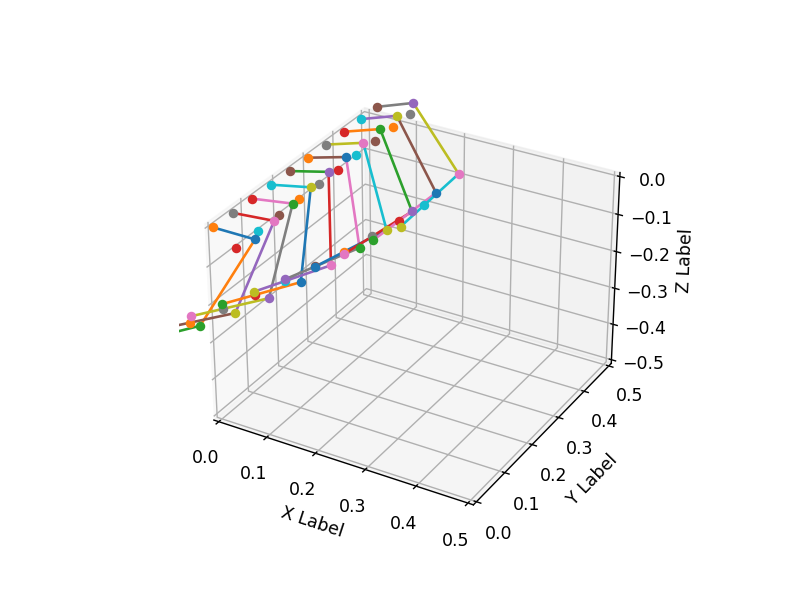

C:\Users\Slava\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
C:\Users\Slava\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
C:\Users\Slava\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (

In [29]:
old_ang = [0,1,1]
my_tau = [-2,-20,-3]
story = [old_ang]*10
for i in range(1,10):
    story[i] = nextState(story[i-1],[0,0,0],my_tau,0.0001,iterations=100)[0,:]

plot_mass(story)

### Вроде хуета работает, дальше проверка rhs - (функция лагранжа), должны остаться только вторые стопени при углах (не забудь раскоментить принт rhs)


In [30]:
lagrange =(L.diff(phi.diff(t))).diff(t) - L.diff(phi)

lagrange = lagrange.subs(subs)
lagrange = lagrange.subs([(m1,mass[0]),(m2,mass[1]),(m3,mass[2]),(g,9.8)])
lagrange = lagrange.subs([(alpha.diff(t,2),0),(theta.diff(t,2),0),(phi.diff(t,2),0)])
lagrange = lagrange.subs([(alpha.diff(t),4),(theta.diff(t),5),(phi.diff(t),6)])
lagrange = lagrange.subs([(alpha,1),(theta,2),(phi,3)])
sp.N(lagrange)

-0.0832877932373001

In [32]:
fun(np.array([1,2,3]),np.array([4,5,6]),np.array([0,0,0]))

array([207.99929222, 256.21482605,  29.3427063 ])

**теперь проверим то что с второй производной все окей, для этого надо занулить все что не оно**

In [ ]:
lagrange =(L.diff(theta.diff(t))).diff(t) - L.diff(theta) * 0

lagrange = lagrange.subs(subs)
lagrange = lagrange.subs([(m1,mass[0]),(m2,mass[1]),(m3,mass[2]),(g,9.8)])
lagrange = lagrange.subs([(alpha.diff(t,2),1),(theta.diff(t,2),2),(phi.diff(t,2),3)])
lagrange = lagrange.subs([(alpha.diff(t),0),(theta.diff(t),0),(phi.diff(t),0)])
lagrange = lagrange.subs([(alpha,1),(theta,2),(phi,3)])
sp.N(lagrange)

In [ ]:
fun(np.array([1,2,3]),np.array([0,0,0]),np.array([0,0,0]))

**Работае ахуенно вроде**

In [28]:
plt_mass = points.subs(subs)
plt_mass = [plt_mass[:,i] for i in range(3)]
plt_mass = [sp.lambdify((angels), plt_mass[i], modules='numpy') for i in range(3)]

def plot_mass(my_angels):
    print(my_angels)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.set_xlim3d(0, 1/2)
    ax.set_ylim3d(0, 1/2)
    ax.set_zlim3d(-1/2, 0)
    
    dy = 0.06
    
    for j in range(len(my_angels)):
        a,t,p =my_angels[j]
        x0,y0,z0 = 0,0,0
        for i in range(3):
            x,y,z = plt_points[i](a,t,p) 
            mx,my,mz = plt_mass[i](a,t,p)
            ax.scatter(x,y + dy*j,z)
            ax.scatter(mx,my + dy*j,mz)
            ax.plot([x0,x],[y0+ dy*j,y+ dy*j],[z0,z])
            x0,y0,z0 = x[0],y[0],z[0]
plt_mass

[<function _lambdifygenerated(_Dummy_110, _Dummy_108, _Dummy_109)>,
 <function _lambdifygenerated(_Dummy_113, _Dummy_111, _Dummy_112)>,
 <function _lambdifygenerated(_Dummy_116, _Dummy_114, _Dummy_115)>]

In [ ]:
plot_mass([[0,0,0]])

In [ ]:
plt_points = [[0,0,0]]*3
plt_points[0] = sp.simplify(U(y,alpha) @ T([d,0,0]))[0:3,-1]
plt_points[1] = sp.simplify(U(y,alpha) @ T([d,0,0]) @ U(x,-theta) @ T([0,0,-l1]))[0:3,-1]
plt_points[2] = sp.simplify(U(y,alpha) @ T([d,0,0]) @ U(x,-theta) @ T([0,0,-l1]) @ U(x,-phi) @ T([0,0,-l2]))[0:3,-1]
plt_points = [plt_points[i].subs(subs) for i in range(3)]
plt_points = [sp.lambdify((angels), plt_points[i], modules='numpy') for i in range(3)]

In [33]:
story

[[0, 1, 1],
 array([-0.11228626,  0.82864826,  1.17268531]),
 array([-0.19440798,  0.68605654,  1.28394535]),
 array([-0.25692819,  0.55740068,  1.36651502]),
 array([-0.30549321,  0.43669079,  1.43247935]),
 array([-0.34359158,  0.32074798,  1.48769879]),
 array([-0.3735062 ,  0.20763619,  1.53546028]),
 array([-0.39677798,  0.09605915,  1.57779899]),
 array([-0.41445966, -0.01492312,  1.61607513]),
 array([-0.42726188, -0.12604691,  1.65125838])]

In [ ]:
[dJ_real[i](1,2,3,4,5,6) for i in range(3)]